# Stopwords and word frequency


Let's count the frequency of the words in the Wikipedia Earth page

We use the same function to download content from wikipedia


In [1]:
# if you haven't done so already, install the wordcloud library
!pip install wordcloud

In [2]:
import requests

def wikipedia_page(title):
    '''
    This function returns the raw text of a wikipedia page
    given a∂ wikipedia page title
    '''
    params = {
        'action': 'query',
        'format': 'json', # request json formatted content
        'titles': title, # title of the wikipedia page
        'prop': 'extracts',
        'explaintext': True
    }
    # send a request to the wikipedia api
    response = requests.get(
         'https://en.wikipedia.org/w/api.php',
         params= params
     ).json()

    # Parse the result
    page = next(iter(response['query']['pages'].values()))
    # return the page content
    if 'extract' in page.keys():
        return page['extract']
    else:
        return "Page not found"


In [3]:
text = wikipedia_page('Earth').lower()

Next, we count the number of times each word is present in the text.

First we split the text over whitespaces and then use the Counter class to find the 20 most common words.

In [4]:
from collections import Counter
# we transform the text into a list of words
# by splitting over the space character ' '
word_list = text.split(' ')
# and count the words
word_counts = Counter(word_list)

In [5]:
word_counts.most_common(20)

[('the', 704),
 ('of', 361),
 ('and', 283),
 ('is', 172),
 ('to', 164),
 ('in', 149),
 ('a', 134),
 ("earth's", 115),
 ('by', 76),
 ('with', 73),
 ('earth', 70),
 ('from', 70),
 ('as', 70),
 ('at', 58),
 ('that', 58),
 ('are', 49),
 ('surface', 47),
 ('about', 43),
 ('it', 42),
 ('this', 41)]

In [6]:
text

'earth is the third planet from the sun and the only astronomical object known to harbor life. this is enabled by earth being a water world, the only one in the solar system sustaining liquid surface water. almost all of earth\'s water is contained in its global ocean, covering 70.8% of earth\'s surface. the remaining 29.2% of earth\'s surface is land, most of which is located in the form of continental landmasses within one hemisphere, earth\'s land hemisphere. most of earth\'s land is somewhat humid and covered by vegetation, while large sheets of ice at earth\'s polar deserts retain more water than earth\'s groundwater, lakes, rivers and atmospheric water together. earth\'s land is part of earth\'s crust, consisting of several slowly moving tectonic plates, which interact to produce mountain ranges, volcanoes, and earthquakes. inside earth\'s crust is a liquid outer core that generates the magnetosphere, deflecting most of the destructive solar winds and cosmic radiation.\nearth has

## Let's remove the stopwords

We define a list of stopwords, frequent words that are mostly meaningless and remove them from the text.


In [7]:
# transform the text into a list of words
words_list = text.split(' ')
# define the list of words you want to remove from the text
stopwords = ['the', 'of', 'and', 'is','to','in','a','from','by','that', 'with', 'this', 'as', 'an', 'are','its', 'at', 'for']
# use a python list comprehension to remove the stopwords from words_list
words_without_stopwords = [ word for word in words_list if word not in stopwords ]


In [9]:
stopwords

['the',
 'of',
 'and',
 'is',
 'to',
 'in',
 'a',
 'from',
 'by',
 'that',
 'with',
 'this',
 'as',
 'an',
 'are',
 'its',
 'at',
 'for']

In [8]:
words_list

['earth',
 'is',
 'the',
 'third',
 'planet',
 'from',
 'the',
 'sun',
 'and',
 'the',
 'only',
 'astronomical',
 'object',
 'known',
 'to',
 'harbor',
 'life.',
 'this',
 'is',
 'enabled',
 'by',
 'earth',
 'being',
 'a',
 'water',
 'world,',
 'the',
 'only',
 'one',
 'in',
 'the',
 'solar',
 'system',
 'sustaining',
 'liquid',
 'surface',
 'water.',
 'almost',
 'all',
 'of',
 "earth's",
 'water',
 'is',
 'contained',
 'in',
 'its',
 'global',
 'ocean,',
 'covering',
 '70.8%',
 'of',
 "earth's",
 'surface.',
 'the',
 'remaining',
 '29.2%',
 'of',
 "earth's",
 'surface',
 'is',
 'land,',
 'most',
 'of',
 'which',
 'is',
 'located',
 'in',
 'the',
 'form',
 'of',
 'continental',
 'landmasses',
 'within',
 'one',
 'hemisphere,',
 "earth's",
 'land',
 'hemisphere.',
 'most',
 'of',
 "earth's",
 'land',
 'is',
 'somewhat',
 'humid',
 'and',
 'covered',
 'by',
 'vegetation,',
 'while',
 'large',
 'sheets',
 'of',
 'ice',
 'at',
 "earth's",
 'polar',
 'deserts',
 'retain',
 'more',
 'water',

We get a very different list of frequent words. Much more relevant to the text.

In [10]:
words_without_stopwords

['earth',
 'third',
 'planet',
 'sun',
 'only',
 'astronomical',
 'object',
 'known',
 'harbor',
 'life.',
 'enabled',
 'earth',
 'being',
 'water',
 'world,',
 'only',
 'one',
 'solar',
 'system',
 'sustaining',
 'liquid',
 'surface',
 'water.',
 'almost',
 'all',
 "earth's",
 'water',
 'contained',
 'global',
 'ocean,',
 'covering',
 '70.8%',
 "earth's",
 'surface.',
 'remaining',
 '29.2%',
 "earth's",
 'surface',
 'land,',
 'most',
 'which',
 'located',
 'form',
 'continental',
 'landmasses',
 'within',
 'one',
 'hemisphere,',
 "earth's",
 'land',
 'hemisphere.',
 'most',
 "earth's",
 'land',
 'somewhat',
 'humid',
 'covered',
 'vegetation,',
 'while',
 'large',
 'sheets',
 'ice',
 "earth's",
 'polar',
 'deserts',
 'retain',
 'more',
 'water',
 'than',
 "earth's",
 'groundwater,',
 'lakes,',
 'rivers',
 'atmospheric',
 'water',
 'together.',
 "earth's",
 'land',
 'part',
 "earth's",
 'crust,',
 'consisting',
 'several',
 'slowly',
 'moving',
 'tectonic',
 'plates,',
 'which',
 'inte

In [11]:
Counter(words_without_stopwords).most_common(20)

[("earth's", 115),
 ('earth', 70),
 ('surface', 47),
 ('about', 43),
 ('it', 42),
 ('solar', 40),
 ('on', 40),
 ('water', 36),
 ('which', 36),
 ('has', 36),
 ('million', 36),
 ('have', 35),
 ('into', 32),
 ('or', 30),
 ('most', 27),
 ('land', 27),
 ('life', 27),
 ('sun', 25),
 ('than', 25),
 ('crust', 25)]

We can generate a wordcloud on the text with the stopwords removed

(-0.5, 599.5, 299.5, -0.5)

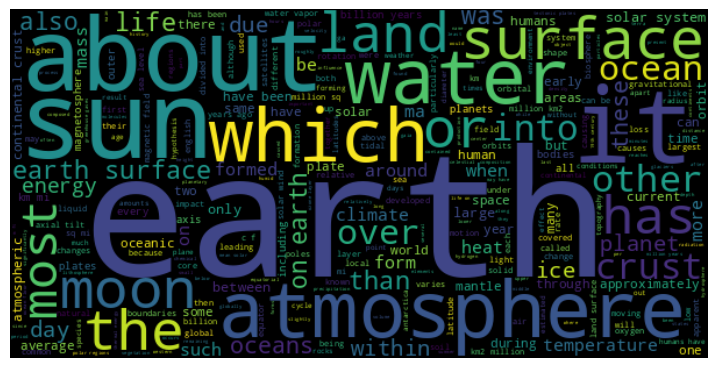

In [12]:
from wordcloud import WordCloud
# Instantiate a new wordcloud.
wordcloud = WordCloud(
        random_state = 8,
        normalize_plurals = False,
        width = 600,
        height= 300,
        max_words = 300,
        stopwords = [])

# Transform the list of words back into a string
text_without_stopwords  = ' '.join(words_without_stopwords)

# Apply the wordcloud to the text.
wordcloud.generate(text_without_stopwords)

# And plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize = (9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# WordCloud stopwords

Wordcloud comes with its own predefined list of stopwords


In [ ]:
print(f"Wordcloud has {len(WordCloud().stopwords)} stopwords:")
print()
print(list(WordCloud().stopwords))


# More exhaustive lists of stopwords

You don't need to use default lists of stopwords. There a couple of github repos that offer much more exhaustive lists.

For instance

* https://github.com/Alir3z4/stop-words has stopwords in several languages
* https://github.com/igorbrigadir/stopwords lists several sources of stopwords.



# Zipf's law

Looking at the frequency of words from the original text we notice a pattern.

The frequency of the nth word is roughly proportional to 1/n. The most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.

Let's calculate the observed relative frequency of a token:

    occurence of the token / occurence of "the"

where "the" is the most common token

and compare it to the inverse of the rank of the token

In [ ]:
import numpy as np
text = wikipedia_page('Earth').lower()
word_list = text.split(' ')
word_counts = Counter(word_list).most_common(10)

maxfreq = word_counts[0][1]
print(f" rank word  observed frequency ~= Zipf frequency")

for i in range(10):
    print(f"{i+1:4}) {word_counts[i][0]:10} freq: {np.round(word_counts[i][1] / word_counts[0][1],2):5} ~= {np.round(1/(i+1),2)}")


Zipf's law is an empirical law observed in multiple domains. The [wikipedia article](https://en.wikipedia.org/wiki/Zipf%27s_law) explains it all.